# get ibcorr from whole layers

In [ ]:
dfibc.loc[("reshading", slice(None), "scale2", 20)]

,ibcorr
study,
short presentation,0.405152
long presentation,0.377791
complexity order,0.366724
oasis,0.160978


In [ ]:
dfibc.loc[("segment_unsup2d", slice(None), "scale4", 41)]

,ibcorr
study,
short presentation,0.464074
long presentation,0.441788
complexity order,0.359942
oasis,0.122006


In [ ]:
dfibc.loc[("vanishing_point", slice(None), "scale8", 18)]

,ibcorr
study,
short presentation,0.440726
long presentation,0.364254
complexity order,0.397447
oasis,0.166637


In [ ]:
dfibc.loc[("segment_unsup25d", slice(None), "scale16", 32)]

,ibcorr
study,
short presentation,0.363642
long presentation,0.342855
complexity order,0.376884
oasis,0.101665


# filter clusters from 3D data
calculate significant clusters in data by cluster based permutation testing

## any .05 significant voxels
not exclusively very highly predictive voxels <br>

These give very large clsuters about 1/3 of all voxels. Which is not very meaningfull.

In [ ]:
scale = "scale2"
model = "reshading"
layer = 20

In [ ]:
study = "study1"
with open(
    os.path.join(
        PATH_PERMDISTR,
        scale,
        "permdistr " + study + " " + model + " " + str(layer) + ".npy",
    ),
    "rb",
) as file:
    permdistr = np.load(file)

(array([ 77., 243., 242., 225.,  98.,  52.,  33.,  20.,   3.,   1.,   1.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([10.  , 13.05, 16.1 , 19.15, 22.2 , 25.25, 28.3 , 31.35, 34.4 ,
        37.45, 40.5 , 43.55, 46.6 , 49.65, 52.7 , 55.75, 58.8 , 61.85,
        64.9 , 67.95, 71.  ]),
 <a list of 20 Patch objects>)

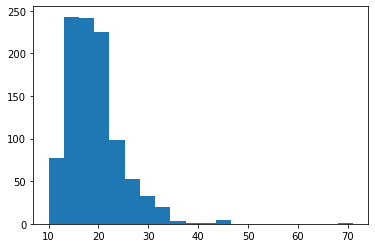

In [ ]:
plt.hist(permdistr, bins=20)

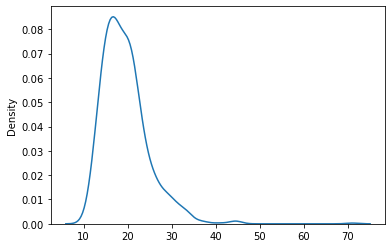

In [ ]:
sns.kdeplot(permdistr)

In [ ]:
threshold = np.quantile(permdistr, .95)
threshold

29.049999999999955

In [ ]:
study = "study1"

with open(
    os.path.join(PATH_3DPVAL, scale, study + " " + model + " " + str(layer) + ".npy"),
    "rb",
) as file:
    data3d = np.load(file)

In [ ]:
data3d.shape

(126, 14, 14)

In [ ]:
clusters = find_clusters(data3d<.05)

In [ ]:
len(clusters)

12

In [ ]:
126*14*14

24696

In [ ]:
clusters[0].shape

(126, 14, 14)

In [ ]:
# clusters above threshold
[cluster.sum() for cluster in clusters if cluster.sum() > threshold]

[8655, 941, 2310]

# map to 3D space: cumulative correlation
from each voxel inside 3x3x3 box aroung location 

In [ ]:
scores = subset_correlations.loc[mo].correlation.values

In [ ]:
scores = subset_correlations.loc[mo].correlation.values[:, np.newaxis].T

In [ ]:
scores[~subset_significance.loc[mo].values] = 0

In [ ]:
subset_correlations.loc[mo].pvalue.values

In [ ]:
ns.map_back_scores(scores, pat)

In [ ]:
scores3d = list(ns.scores.values())[0]

# localized ibcorr outperforms whole layer ibcorr
still need to include comapre correlations ?

In [ ]:
rat = beauty_ratings["study3_places2.csv"].values.flatten()

In [ ]:
dfibc = load_ibcorr(PATH_IBCORR)

In [ ]:
subset_correlations.correlation.groupby("model").max()

model
autoencoding        0.362207
class_scene         0.480581
curvature           0.455136
egomotion           0.371716
keypoints3d         0.460132
nonfixated_pose     0.401111
normal              0.503802
reshading           0.458294
room_layout         0.483429
segment_unsup25d    0.469479
segment_unsup2d     0.374942
vanishing_point     0.416983
Name: correlation, dtype: float64

In [ ]:
dfibc.loc[(_models_ordered, "complexity order", "scale4", slice(None))].droplevel(
    ["study", "scale"]
).loc[bestlayers]

,,ibcorr
model,layer,
autoencoding,25,0.252745
class_scene,36,0.386861
curvature,32,0.480282
egomotion,33,0.280207
keypoints3d,41,0.441996
nonfixated_pose,41,0.280803
normal,41,0.419579
reshading,46,0.454562
room_layout,41,0.424132


In [ ]:
bestlayers = (
    dfibc.loc[(_models_ordered, "complexity order", "scale4", slice(None))]
    .droplevel(["study", "scale"])
    .groupby("model")
    .idxmax()
    .ibcorr.map(lambda x: x[1])
    .to_frame()
    .reset_index()
    .values.tolist()
)

# cluster permutation distributions
cluster based permutation testing of pvalue clusters, at each scale  & study

In [ ]:
# permutation test size for all tets
n_permutations = 1000

In [ ]:
def run_calculateclusters(scale, model, layer, study, n_permutations):
    """
    Wrapper around permutation_distribution() that handles
    loading input and saving output for the given data.

    """
    with open(
        os.path.join(
            PATH_PERMDISTR,
            scale,
            "permdistr " + study + " " + model + " " + str(layer) + ".npy",
        ),
        "wb",
    ) as file:
        np.save(
            file,
            permutation_distribtion(
                pd.read_hdf(
                    os.path.join(
                        PATH_SSINT,
                        scale,
                        study2dataset(study) + " " + model + " " + str(layer) + ".h5",
                    ),
                    key="subset integration",
                ),
                studyratings(study),
                layer,
                n_permutations,
            ),
        )

## scale2

In [ ]:
scale = "scale2"
model = "reshading"
layer = 20

In [ ]:
run_calculateclusters(scale, model, layer, "study1", n_permutations)

In [ ]:
# due to key being with and underscore in this one!!!
study = "study3"
with open(
    os.path.join(
        PATH_PERMDISTR,
        scale,
        "permdistr " + study + " " + model + " " + str(layer) + ".npy",
    ),
    "wb",
) as file:
    np.save(
        file,
        permutation_distribtion(
            pd.read_hdf(
                os.path.join(
                    PATH_SSINT,
                    scale,
                    study2dataset(study) + " " + model + " " + str(layer) + ".h5",
                ),
                key="subset_integration",
            ),
            studyratings(study),
            layer,
            n_permutations,
        ),
    )

In [ ]:
run_calculateclusters(scale, model, layer, "study3", n_permutations)

In [ ]:
#run_calculateclusters(scale, model, layer, "study4", n_permutations)

## scale4

In [ ]:
scale = "scale4"
model = "segment_unsup2d"
layer = 41

In [ ]:
run_calculateclusters(scale, model, layer, "study1", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study2", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study3", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study4", n_permutations)

## scale8

In [ ]:
scale = "scale8"
model = "vanishing_point"
layer = 18

In [ ]:
run_calculateclusters(scale, model, layer, "study1", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study2", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study3", n_permutations)

In [ ]:
#run_calculateclusters(scale, model, layer, "study4", n_permutations)

## scale16

In [ ]:
scale = "scale16"
model = "segment_unsup25d"
layer = 32

In [ ]:
run_calculateclusters(scale, model, layer, "study1", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study2", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study3", n_permutations)

In [ ]:
run_calculateclusters(scale, model, layer, "study4", n_permutations)